<a href="https://colab.research.google.com/github/ohnownihs/NLP/blob/master/learning_spoons_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 순환 신경망 RNN

## Numpy로 순환 신경망 구현하기

In [ ]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_dim = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_dim)) # 입력에 해당되는 2D 텐서

# 은닉 상태의 크기 hidden_size로 은닉 상태를 만든다.
hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화

In [ ]:
print(hidden_state_t) # 8의 크기를 가지는 은닉 상태. 현재는 초기 은닉 상태로 모든 차원이 0의 값을 가짐.

[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
Wx = np.random.random((hidden_size, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [ ]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.95873406 0.79515297 0.92145083 0.97865783 0.91884658 0.82515544
  0.91737174 0.92012989]
 [0.99981791 0.99965362 0.99998404 0.99998253 0.99993042 0.99952855
  0.999984   0.99998932]
 [0.99988869 0.9998296  0.99999629 0.99999088 0.99993959 0.99985599
  0.99998675 0.99999758]
 [0.99994262 0.99988948 0.99999395 0.99999514 0.99996989 0.99982221
  0.99999508 0.99999755]
 [0.99996863 0.99990558 0.99999767 0.99999761 0.99998378 0.99984932
  0.99999605 0.99999846]
 [0.99995637 0.99991812 0.99999817 0.9999957  0.99995495 0.99990925
  0.99998852 0.99999856]
 [0.99990243 0.999895   0.99998959 0.99998943 0.99991674 0.9998682
  0.99999011 0.99999755]
 [0.99974392 0.99977292 0.99999222 0.99997629 0.99985774 0.99979455
  0.99997325 0.99999152]
 [0.99997262 0.99993916 0.99999701 0.99999727 0.99997379 0.99989229
  0.999995   0.99999866]
 [0.99984718 0.99984778 0.99999422 0.99998454 0.99987885 0.99986568
  0.99997828 0.99999629]]

## 순환 신경망 구현 이해하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, LSTM, GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


input_length = time_step

파라미터수가 왜 42가 되는지 생각해봅시다. 입력 차원이 10일 때, hidden_size는 3입니다.  
스스로 고민해봅시다.  
참고로 time_step은 파라미터 수에 전혀 영향을 주지 않습니다.  

출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때, output_dim은 hidden_size의 값인 3입니다. 이 경우 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)이 됩니다. 이번에는 batch_size를 미리 정의해보겠습니다.

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


batch_size를 8로 기재하자, 출력의 크기가 (8, 3)이 된 것을 볼 수 있습니다. 이제 return_sequences 매개 변수에 True를 기재하여 출력값으로 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴하도록 모델을 만들어 보도록 하겠습니다.

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력의 크기가 (8, 2, 3)이 된 것을 확인할 수 있습니다.

## 은닉층이 2개인 깊은 순환 신경망

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_size, return_sequences = True))
model.add(SimpleRNN(hidden_size, return_sequences = True))

## 양방향 순환 신경망

In [ ]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))

## 깊은 양방향 순환 신경망

In [ ]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))

## LSTM 구현하기

In [ ]:
# 실제 LSTM 은닉층을 추가하는 코드.
model = Sequential()
model.add(LSTM(hidden_size, input_shape=(timesteps, input_dim)))

## GRU 구현하기

In [ ]:
# 실제 GRU 은닉층을 추가하는 코드.
model = Sequential()
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

# RNN 언어 모델 (char 단위)

## 데이터 전처리

In [ ]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

In [ ]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")
f = open('11-0.txt', 'rb')
lines=[]
for line in f: # 데이터를 한 줄씩 읽는다.
    line=line.strip() # strip()을 통해 \r, \n을 제거한다.
    line=line.lower() # 소문자화.
    line=line.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(line) > 0:
        lines.append(line)
f.close()

In [ ]:
lines[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  you may copy it, give it away or',
 're-use it under the terms of the project gutenberg license included',
 'with this ebook or online at www.gutenberg.org']

In [ ]:
text = ' '.join(lines)
print('문자열의 길이 또는 총 글자의 개수: %d' % len(text))

문자열의 길이 또는 총 글자의 개수: 159612


In [ ]:
print(text[:200])

the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  you may copy it, g


In [ ]:
char_vocab = sorted(list(set(text)))
vocab_size=len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))

글자 집합의 크기 : 57


In [ ]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '@': 27, '[': 28, ']': 29, '_': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56}


In [ ]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key

Example) 샘플의 길이가 4라면 4개의 입력 글자 시퀀스로 부터 4개의 출력 글자  시퀀스를 예측.  
즉, RNN의 time step은 4번  
appl -> pple  
appl은 train_X(입력 시퀀스), pple는 train_y(예측해야하는 시퀀스)에 저장한다.

In [ ]:
seq_length = 60 # 문장의 길이를 60으로 한다.
n_samples = int(np.floor((len(text) - 1) / seq_length)) # 문자열을 60등분한다. 그러면 즉, 총 샘플의 개수
print ('문장 샘플의 수 : {}'.format(n_samples))

문장 샘플의 수 : 2660


In [ ]:
train_X = []
train_y = []

for i in range(n_samples): # 2,646번 수행
    X_sample = text[i * seq_length: (i + 1) * seq_length]
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 가져온다.
    X_encoded = [char_to_index[c] for c in X_sample] # 하나의 문장 샘플에 대해서 정수 인코딩
    train_X.append(X_encoded)

    y_sample = text[i * seq_length + 1: (i + 1) * seq_length + 1] # 오른쪽으로 1칸 쉬프트한다.
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [ ]:
print(train_X[0])

[50, 38, 35, 0, 46, 48, 45, 40, 35, 33, 50, 0, 37, 51, 50, 35, 44, 32, 35, 48, 37, 0, 35, 32, 45, 45, 41, 0, 45, 36, 0, 31, 42, 39, 33, 35, 49, 0, 31, 34, 52, 35, 44, 50, 51, 48, 35, 49, 0, 39, 44, 0, 53, 45, 44, 34, 35, 48, 42, 31]


In [ ]:
print(train_y[0])

[38, 35, 0, 46, 48, 45, 40, 35, 33, 50, 0, 37, 51, 50, 35, 44, 32, 35, 48, 37, 0, 35, 32, 45, 45, 41, 0, 45, 36, 0, 31, 42, 39, 33, 35, 49, 0, 31, 34, 52, 35, 44, 50, 51, 48, 35, 49, 0, 39, 44, 0, 53, 45, 44, 34, 35, 48, 42, 31, 44]


In [ ]:
print(train_X[1])

[44, 34, 10, 0, 32, 55, 0, 42, 35, 53, 39, 49, 0, 33, 31, 48, 48, 45, 42, 42, 0, 50, 38, 39, 49, 0, 35, 32, 45, 45, 41, 0, 39, 49, 0, 36, 45, 48, 0, 50, 38, 35, 0, 51, 49, 35, 0, 45, 36, 0, 31, 44, 55, 45, 44, 35, 0, 31, 44, 55]


In [ ]:
print(train_y[1])

[34, 10, 0, 32, 55, 0, 42, 35, 53, 39, 49, 0, 33, 31, 48, 48, 45, 42, 42, 0, 50, 38, 39, 49, 0, 35, 32, 45, 45, 41, 0, 39, 49, 0, 36, 45, 48, 0, 50, 38, 35, 0, 51, 49, 35, 0, 45, 36, 0, 31, 44, 55, 45, 44, 35, 0, 31, 44, 55, 53]


In [ ]:
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

In [ ]:
print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2660, 60, 57)
train_y의 크기(shape) : (2660, 60, 57)


이는 샘플의 수(No. of samples)가 2,646개, 입력 시퀀스의 길이(input_length)가 60, 각 벡터의 차원(input_dim)이 57임을 의미합니다. 원-핫 벡터의 차원은 글자 집합의 크기인 57이어야 하므로 원-핫 인코딩이 수행되었음을 알 수 있습니다.

## 모델 설계하기

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

Epoch 1/80
84/84 - 1s - loss: 3.0858 - accuracy: 0.1806
Epoch 2/80
84/84 - 1s - loss: 2.7181 - accuracy: 0.2567
Epoch 3/80
84/84 - 1s - loss: 2.3902 - accuracy: 0.3287
Epoch 4/80
84/84 - 1s - loss: 2.2475 - accuracy: 0.3604
Epoch 5/80
84/84 - 1s - loss: 2.1407 - accuracy: 0.3877
Epoch 6/80
84/84 - 1s - loss: 2.0551 - accuracy: 0.4075
Epoch 7/80
84/84 - 1s - loss: 1.9821 - accuracy: 0.4268
Epoch 8/80
84/84 - 1s - loss: 1.9216 - accuracy: 0.4424
Epoch 9/80
84/84 - 1s - loss: 1.8667 - accuracy: 0.4600
Epoch 10/80
84/84 - 1s - loss: 1.8173 - accuracy: 0.4732
Epoch 11/80
84/84 - 1s - loss: 1.7725 - accuracy: 0.4839
Epoch 12/80
84/84 - 1s - loss: 1.7363 - accuracy: 0.4944
Epoch 13/80
84/84 - 1s - loss: 1.6948 - accuracy: 0.5052
Epoch 14/80
84/84 - 1s - loss: 1.6600 - accuracy: 0.5146
Epoch 15/80
84/84 - 1s - loss: 1.6235 - accuracy: 0.5238
Epoch 16/80
84/84 - 1s - loss: 1.5879 - accuracy: 0.5327
Epoch 17/80
84/84 - 1s - loss: 1.5543 - accuracy: 0.5412
Epoch 18/80
84/84 - 1s - loss: 1.5228 - 

In [ ]:
def sentence_generation(model, length):
    ix = [np.random.randint(vocab_size)] # 글자에 대한 랜덤 인덱스 생성
    y_char = [index_to_char[ix[-1]]] # 랜덤 익덱스로부터 글자 생성
    print(ix[-1],'번 글자',y_char[-1],'로 예측을 시작!')
    X = np.zeros((1, length, vocab_size)) # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성

    for i in tf.range(length):
        i = tf.cast(i, tf.int64)
        X[0][i][ix[-1]] = 1 # X[0][i][예측한 글자의 인덱스] = 1, 즉, 예측 글자를 다음 입력 시퀀스에 추가
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [ ]:
sentence_generation(model, 100)

35 번 글자 e 로 예측을 시작!
e to say out of the way is. station. what extled its all asked ays. as she said the last word with s

'e to say out of the way is. station. what extled its all asked ays. as she said the last word with su'

# 3. 로이터 뉴스 분류하기

## 데이터 이해하기

In [ ]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [ ]:
print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [ ]:
print(X_train[0]) # 첫번째 훈련용 뉴스 기사
print(y_train[0]) # 첫번째 훈련용 뉴스 기사의 레이블

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


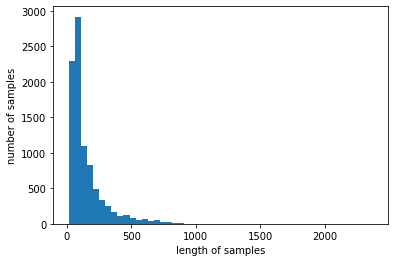

In [ ]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

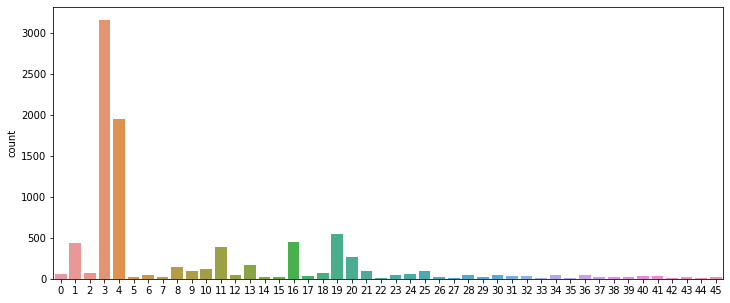

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))
# label_cnt=dict(zip(unique_elements, counts_elements))
# 아래의 출력 결과가 보기 불편하여 병렬로 보고싶다면 위의 label_cnt를 출력

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_to_index = reuters.get_word_index()
print(word_to_index)

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

In [ ]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


## 모델 설계하기

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [ ]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

In [ ]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [ ]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

patience는 '현재 최고 성능'을 기준으로 더 나아지지 않는 경우를 연속 n번까지는 참는다입니다. 예를 들어서 patience가 2라고 했을 때 멈추는 경우는 다음과 같습니다.  

val_loss: 0.5921 < 현재 최고 성능  
val_loss: 0.5731 < 현재 최고 성능  
val_loss: 0.5956 < 1번 참음  
val_loss: 0.5753 < 2번 참음 (loss가 직전 대비 줄은 것과는 상관 없음)  
val_loss: 0.5977 < 더 이상 못 참으므로 중단

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))


Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 2.6551 - acc: 0.3448
Epoch 00001: val_acc improved from -inf to 0.36198, saving model to best_model.h5
71/71 [==============================] - 2s 24ms/step - loss: 2.6551 - acc: 0.3448 - val_loss: 2.3814 - val_acc: 0.3620
Epoch 2/30
68/71 [===========================>..] - ETA: 0s - loss: 2.1161 - acc: 0.4848
Epoch 00002: val_acc improved from 0.36198 to 0.51202, saving model to best_model.h5
71/71 [==============================] - 1s 17ms/step - loss: 2.1077 - acc: 0.4866 - val_loss: 2.0185 - val_acc: 0.5120
Epoch 3/30
68/71 [===========================>..] - ETA: 0s - loss: 1.8763 - acc: 0.5355
Epoch 00003: val_acc improved from 0.51202 to 0.56456, saving model to best_model.h5
71/71 [==============================] - 1s 18ms/step - loss: 1.8712 - acc: 0.5354 - val_loss: 1.7831 - val_acc: 0.5646
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.7061 - acc: 0.5668
Epoch 00004: val_acc improved fr

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.2210 - acc: 0.7137

 테스트 정확도: 0.7137


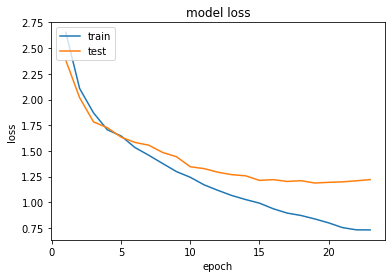

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 4. IMDB 리뷰 분류하기

## 데이터 이해하기

In [ ]:
from tensorflow.keras.datasets import imdb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
(X_train, y_train), (X_test, y_test) = imdb.load_data()
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [ ]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


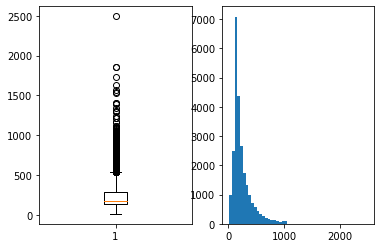

In [ ]:
len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [ ]:
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but w

## 모델 설계하기

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)

In [ ]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[es, mc])

Epoch 1/10
390/391 [============================>.] - ETA: 0s - loss: 0.4457 - acc: 0.7867
Epoch 00001: val_acc improved from -inf to 0.85164, saving model to best_model.h5
391/391 [==============================] - 24s 62ms/step - loss: 0.4455 - acc: 0.7868 - val_loss: 0.3473 - val_acc: 0.8516
Epoch 2/10
391/391 [==============================] - ETA: 0s - loss: 0.3500 - acc: 0.8530
Epoch 00002: val_acc did not improve from 0.85164
391/391 [==============================] - 24s 61ms/step - loss: 0.3500 - acc: 0.8530 - val_loss: 0.7200 - val_acc: 0.5554
Epoch 3/10
391/391 [==============================] - ETA: 0s - loss: 0.3646 - acc: 0.8420
Epoch 00003: val_acc improved from 0.85164 to 0.86956, saving model to best_model.h5
391/391 [==============================] - 24s 62ms/step - loss: 0.3646 - acc: 0.8420 - val_loss: 0.3250 - val_acc: 0.8696
Epoch 4/10
391/391 [==============================] - ETA: 0s - loss: 0.3070 - acc: 0.8748
Epoch 00004: val_acc did not improve from 0.86956


In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 10s 13ms/step - loss: 0.3467 - acc: 0.8747

 테스트 정확도: 0.8747


# 5. 네이버 영화 리뷰 분류하기

## 네이버 영화 리뷰 데이터 전처리하기 #1

In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7fdfb45cab38>)

In [ ]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 150000


In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력

테스트용 리뷰 개수 : 50000


In [ ]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [ ]:
train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [ ]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 146183


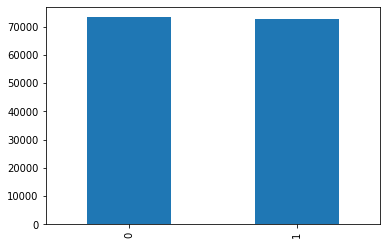

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data))

146182


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    391
label         0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
584,7117896,NaN,0
593,6478189,NaN,0
638,9364602,NaN,0
668,1600635,NaN,0
1559,6918082,NaN,1


In [ ]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145791


In [ ]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48995


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

### 형태소 분석기를 이용한 토크나이징

In [ ]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
print(X_train[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [ ]:
X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

### TF-IDF를 이용한 벡터화 (선택적)

In [ ]:
# vocab_size = 5000

In [ ]:
# tokenizer = Tokenizer(num_words = vocab_size)
# tokenizer.fit_on_texts(X_train)

In [ ]:
# tfidf_train = tokenizer.texts_to_matrix(X_train, mode='tfidf') # 샘플 수 × vocab_size 크기의 행렬 생성
# tfidf_test = tokenizer.texts_to_matrix(X_test, mode='tfidf') # 샘플 수 × vocab_size 크기의 행렬 생성

In [ ]:
# y_train = np.array(train_data['label'])
# y_test = np.array(test_data['label'])

In [ ]:
# print('훈련 샘플 본문의 크기 : {}'.format(tfidf_train.shape))
# print('훈련 샘플 레이블의 크기 : {}'.format(tfidf_test.shape))
#print('테스트 샘플 본문의 크기 : {}'.format(len(X_train)))
# p rint('테스트 샘플 레이블의 크기 : {}'.format(len(y_test)))

## 다층 퍼셉트론으로 네이버 영화 리뷰 분류하기 (선택적)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

In [ ]:
'''
model = Sequential()
model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(tfidf_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
score = model.evaluate(tfidf_test, y_test, batch_size=128, verbose=0)
'''

"\nmodel = Sequential()\nmodel.add(Dense(256, input_shape=(vocab_size,), activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(2, activation='softmax'))\n\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\nmodel.fit(tfidf_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)\nscore = model.evaluate(tfidf_test, y_test, batch_size=128, verbose=0)\n"

## 네이버 영화 리뷰 데이터 전처리하기 #2

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '너무': 8, '다': 9, '정말': 10, '되다': 11, '재밌다': 12, '적': 13, '만': 14, '같다': 15, '진짜': 16, '로': 17, '아니다': 18, '않다': 19, '점': 20, '에서': 21, '만들다': 22, '나오다': 23, '연기': 24, '것': 25, '평점': 26, '내': 27, '최고': 28, '그': 29, '나': 30, '안': 31, '인': 32, '스토리': 33, '생각': 34, '못': 35, '왜': 36, '드라마': 37, '게': 38, '감동': 39, '사람': 40, '보고': 41, '이렇다': 42, '말': 43, '고': 44, '아깝다': 45, '더': 46, '배우': 47, '때': 48, 'ㅋㅋ': 49, '아': 50, '감독': 51, '거': 52, '그냥': 53, '재미있다': 54, '요': 55, '재미': 56, '시간': 57, '내용': 58, '뭐': 59, '까지': 60, '중': 61, '주다': 62, '자다': 63, '하고': 64, '지루하다': 65, '재미없다': 66, '쓰레기': 67, '수': 68, '네': 69, '모르다': 70, '가다': 71, '들다': 72, '그렇다': 73, '싶다': 74, '지': 75, '작품': 76, '사랑': 77, '알다': 78, '하나': 79, '다시': 80, '마지막': 81, '볼': 82, '이건': 83, '정도': 84, '저': 85, '완전': 86, '오다': 87, 'ㅋ': 88, 'ㅠㅠ': 89, '많다': 90, '처음': 91, 'ㅋㅋㅋ': 92, '장면': 93, '액션': 94, '주인공': 95, '이렇게': 96, '안되다': 97, '걸': 98, '차다': 99, '나다': 100, '개': 101, '하': 1

단어가 43,000개가 넘게 존재합니다. 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에, 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미합니다. 여기서는 빈도수가 낮은 단어들은 자연어 처리에서 배제하고자 합니다. 등장 빈도수가 3회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해봅시다.

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43752
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율: 55.62488571950996
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8715872104872904


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19417


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)

### 정수 인코딩(워드 임베딩을 사용한 신경망 사용하기)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[51, 455, 17, 261, 660], [934, 458, 42, 603, 2, 215, 1450, 25, 962, 676, 20], [387, 2445, 1, 2316, 5672, 3, 223, 10]]


In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145380
145380


### 패딩(Padding)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 11.002187371027652


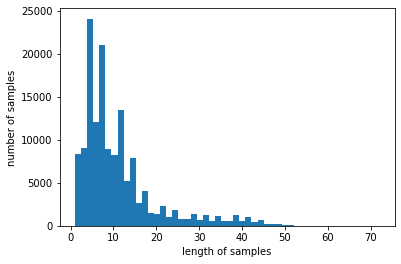

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.0830925849498


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
print(X_train[:5])

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    51   455    17   261   660]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0   934   458    42   603     2
    215  1450    25   962   676    20]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0   387  2445
      1  2316  5672     3   223    10]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0  6493   106
   8119   219    57     5    27  3604]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0  1024     1    30  9146    25   834     2  2580    22  1109
    241 14244     1  1077   255   241]]


## LSTM으로 네이버 영화 리뷰 분류하기

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size = 128, validation_split = 0.2)

Epoch 1/15
909/909 [==============================] - ETA: 0s - loss: 0.3939 - acc: 0.8209
Epoch 00001: val_acc improved from -inf to 0.84307, saving model to best_model.h5
909/909 [==============================] - 12s 14ms/step - loss: 0.3939 - acc: 0.8209 - val_loss: 0.3567 - val_acc: 0.8431
Epoch 2/15
907/909 [============================>.] - ETA: 0s - loss: 0.3265 - acc: 0.8571
Epoch 00002: val_acc improved from 0.84307 to 0.85552, saving model to best_model.h5
909/909 [==============================] - 12s 14ms/step - loss: 0.3265 - acc: 0.8571 - val_loss: 0.3343 - val_acc: 0.8555
Epoch 3/15
907/909 [============================>.] - ETA: 0s - loss: 0.2999 - acc: 0.8718
Epoch 00003: val_acc improved from 0.85552 to 0.85682, saving model to best_model.h5
909/909 [==============================] - 11s 12ms/step - loss: 0.2998 - acc: 0.8718 - val_loss: 0.3366 - val_acc: 0.8568
Epoch 4/15
905/909 [============================>.] - ETA: 0s - loss: 0.2801 - acc: 0.8827
Epoch 00004: va

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1532/1532 [==============================] - 4s 3ms/step - loss: 0.3383 - acc: 0.8519

 테스트 정확도: 0.8519


In [ ]:
word_to_index = tokenizer.word_index

In [ ]:
print(word_to_index)

{'OOV': 1, '영화': 2, '보다': 3, '을': 4, '없다': 5, '이다': 6, '있다': 7, '좋다': 8, '너무': 9, '다': 10, '정말': 11, '되다': 12, '재밌다': 13, '적': 14, '만': 15, '같다': 16, '진짜': 17, '로': 18, '아니다': 19, '않다': 20, '점': 21, '에서': 22, '만들다': 23, '나오다': 24, '연기': 25, '것': 26, '평점': 27, '내': 28, '최고': 29, '그': 30, '나': 31, '안': 32, '인': 33, '스토리': 34, '생각': 35, '못': 36, '왜': 37, '드라마': 38, '게': 39, '감동': 40, '사람': 41, '보고': 42, '이렇다': 43, '말': 44, '고': 45, '아깝다': 46, '더': 47, '배우': 48, '때': 49, 'ㅋㅋ': 50, '아': 51, '감독': 52, '거': 53, '그냥': 54, '재미있다': 55, '요': 56, '재미': 57, '시간': 58, '내용': 59, '뭐': 60, '까지': 61, '중': 62, '주다': 63, '자다': 64, '하고': 65, '지루하다': 66, '재미없다': 67, '쓰레기': 68, '수': 69, '네': 70, '모르다': 71, '가다': 72, '들다': 73, '그렇다': 74, '싶다': 75, '지': 76, '작품': 77, '사랑': 78, '알다': 79, '하나': 80, '다시': 81, '마지막': 82, '볼': 83, '이건': 84, '정도': 85, '저': 86, '완전': 87, '오다': 88, 'ㅋ': 89, 'ㅠㅠ': 90, '많다': 91, '처음': 92, 'ㅋㅋㅋ': 93, '장면': 94, '액션': 95, '주인공': 96, '이렇게': 97, '안되다': 98, '걸': 99, '차다': 100, '나다': 101, '개':

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen=max_len)
  score = float(model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

95.75% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

96.88% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

99.91% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('감독 뭐하는 놈이냐?')

96.36% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

92.74% 확률로 긍정 리뷰입니다.



## 1D CNN으로 네이버 영화 리뷰 분류하기

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

model_input = Input(shape = (max_len,))

z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

# Convolutional block
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 128)      2485376     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 30, 128)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 28, 128)      49280       dropout[0][0]                    
______________________________________________________________________________________________

Conv1d를 이해했는지 테스트하는 가장 좋은 방법은 파라미터의 개수를 이해할 수 있느냐를 점검해보는 것입니다.  
Conv1d의 커널 크기 3짜리의 총 파라미터수는 49,280입니다.  
이는 3 * 128 * 128 + 128의 결과입니다.  
왜 이런 계산이 나오는지 생각해봅시다.

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_data = (X_test, y_test), verbose=2, callbacks=[es, mc])

Epoch 1/10

Epoch 00001: val_acc improved from -inf to 0.83927, saving model to CNN_model.h5
2272/2272 - 52s - loss: 0.4269 - acc: 0.7968 - val_loss: 0.3654 - val_acc: 0.8393
Epoch 2/10

Epoch 00002: val_acc improved from 0.83927 to 0.84225, saving model to CNN_model.h5
2272/2272 - 51s - loss: 0.3462 - acc: 0.8507 - val_loss: 0.3564 - val_acc: 0.8422
Epoch 3/10

Epoch 00003: val_acc improved from 0.84225 to 0.84262, saving model to CNN_model.h5
2272/2272 - 50s - loss: 0.3162 - acc: 0.8658 - val_loss: 0.3559 - val_acc: 0.8426
Epoch 4/10

Epoch 00004: val_acc improved from 0.84262 to 0.84276, saving model to CNN_model.h5
2272/2272 - 49s - loss: 0.2939 - acc: 0.8765 - val_loss: 0.3565 - val_acc: 0.8428
Epoch 5/10

Epoch 00005: val_acc did not improve from 0.84276
2272/2272 - 50s - loss: 0.2759 - acc: 0.8856 - val_loss: 0.3630 - val_acc: 0.8403
Epoch 6/10

Epoch 00006: val_acc did not improve from 0.84276
2272/2272 - 48s - loss: 0.2606 - acc: 0.8924 - val_loss: 0.3666 - val_acc: 0.8408
Epo

In [ ]:
loaded_model = load_model('CNN_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1532/1532 [==============================] - 3s 2ms/step - loss: 0.3565 - acc: 0.8428

 테스트 정확도: 0.8428


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen=max_len)
  score = float(model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

93.73% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

97.03% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

97.18% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('감독 뭐하는 놈이냐?')

82.89% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

85.93% 확률로 긍정 리뷰입니다.



참고 자료 : https://github.com/alexander-rakhlin/CNN-for-Sentence-Classification-in-Keras/blob/master/sentiment_cnn.py

# 6. ELMo를 사용해서 스팸 메일 분류하기

텐서플로우허브에서 제공하는 ELMo는 아직 텐서플로우 2.x대 버전에서는 사용이 불가합니다.  
그래서 1.x대 버전으로 버전을 낮추고 사용해야 합니다.

In [ ]:
# 이 코드를 수행한 뒤에는 상단 메뉴에서 런타임 > 런타임 다시 시작을 해주세요.
# 그리고나서 이 코드를 재수행하였을 때 'TensorFlow 1.x selected.'가 된다면 정상적으로 실행된 것입니다.
%tensorflow_version 1.x

In [ ]:
!pip install tensorflow-hub

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from keras import backend as K
import urllib.request
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [ ]:
elmo = hub.Module("https://tfhub.dev/google/elmo/1", trainable=True)
# 텐서플로우 허브로부터 ELMo를 다운로드

sess = tf.Session()
K.set_session(sess)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin-1')
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
y_data = list(data['v1'])
X_data = list(data['v2'])

In [ ]:
X_data[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [ ]:
print(y_data[:5])

[0, 0, 1, 0, 0]


In [ ]:
print(len(X_data))
n_of_train = int(len(X_data) * 0.8)
n_of_test = int(len(X_data) - n_of_train)
print(n_of_train)
print(n_of_test)

5572
4457
1115


In [ ]:
X_train = np.asarray(X_data[:n_of_train]) #X_data 데이터 중에서 앞의 4457개의 데이터만 저장
y_train = np.asarray(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4457개의 데이터만 저장
X_test = np.asarray(X_data[n_of_train:]) #X_data 데이터 중에서 뒤의 1115개의 데이터만 저장
y_test = np.asarray(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1115개의 데이터만 저장

In [ ]:
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), as_dict=True, signature="default")["default"]
# 데이터의 이동이 케라스 → 텐서플로우 → 케라스가 되도록 하는 함수

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Lambda, Input

input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model = Model(inputs=[input_text], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
history = model.fit(X_train, y_train, epochs=1, batch_size=64)

Train on 4457 samples
4457/4457 [==============================] - 31s 7ms/sample - loss: 0.1011 - acc: 0.9668


In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1115/1115 [==============================] - 8s 7ms/sample - loss: 0.0622 - acc: 0.9767

 테스트 정확도: 0.9767
